In [2]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [3]:
# Set file paths
hd_csv = Path("HD.csv")
jnj_csv = Path("JNJ.csv")
intc_csv = Path("INTC.csv")
amd_csv = Path("AMD.csv")
mu_csv = Path("MU.csv")
nvda_csv = Path("NVDA.csv")
tsm_csv = Path("TSM.csv")


In [13]:
# Read the individual CSV datasets
hd_df = pd.read_csv(hd_csv, parse_dates=True, infer_datetime_format=True)
hd_df.set_index("date", inplace=True)
jnj_df = pd.read_csv(jnj_csv, parse_dates=True, infer_datetime_format=True)
jnj_df.set_index("date", inplace=True)
intc_df = pd.read_csv(intc_csv, parse_dates=True, infer_datetime_format=True)
intc_df.set_index("date", inplace=True)
amd_df = pd.read_csv(amd_csv, parse_dates=True, infer_datetime_format=True)
amd_df.set_index("date", inplace=True)
mu_df = pd.read_csv(mu_csv, parse_dates=True, infer_datetime_format=True)
mu_df.set_index("date", inplace=True)
nvda_df = pd.read_csv(nvda_csv, parse_dates=True, infer_datetime_format=True)
nvda_df.set_index("date", inplace=True)
tsm_df = pd.read_csv(tsm_csv, parse_dates=True, infer_datetime_format=True)
tsm_df.set_index("date", inplace=True)

In [14]:
hd_df.head()

,HD
date,
5/14/19,191.62
5/13/19,190.34
5/10/19,194.58
5/9/19,194.58
5/8/19,195.17


In [15]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
combined_df = pd.concat([hd_df, jnj_df, intc_df, amd_df, mu_df, nvda_df, tsm_df], axis="columns", join="inner")
combined_df.head()

,HD,JNJ,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
5/14/19,191.62,66.97,45.17,27.32,38.51,162.04,41.97
5/13/19,190.34,66.49,44.76,26.24,37.38,158.45,40.99
5/10/19,194.58,67.22,46.20,27.96,38.94,168.82,42.83
5/9/19,194.58,66.04,46.62,27.21,39.27,170.19,43.25
5/8/19,195.17,66.02,49.24,27.09,39.75,173.92,43.70


In [16]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = combined_df.pct_change()
daily_returns.head()

,HD,JNJ,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
5/14/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5/13/19,-0.006680,-0.007167,-0.009077,-0.039531,-0.029343,-0.022155,-0.023350
5/10/19,0.022276,0.010979,0.032172,0.065549,0.041734,0.065447,0.044889
5/9/19,0.000000,-0.017554,0.009091,-0.026824,0.008475,0.008115,0.009806
5/8/19,0.003032,-0.000303,0.056199,-0.004410,0.012223,0.021917,0.010405


In [19]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()
correlation

,HD,JNJ,INTC,AMD,MU,NVDA,TSM
HD,1.000000,0.329386,0.429047,0.294653,0.375932,0.360918,0.393293
JNJ,0.329386,1.000000,0.318188,0.254498,0.337060,0.257717,0.317493
INTC,0.429047,0.318188,1.000000,0.385877,0.511066,0.483262,0.500741
AMD,0.294653,0.254498,0.385877,1.000000,0.438329,0.471212,0.352482
MU,0.375932,0.337060,0.511066,0.438329,1.000000,0.517198,0.477247
NVDA,0.360918,0.257717,0.483262,0.471212,0.517198,1.000000,0.472496
TSM,0.393293,0.317493,0.500741,0.352482,0.477247,0.472496,1.000000


<AxesSubplot:>

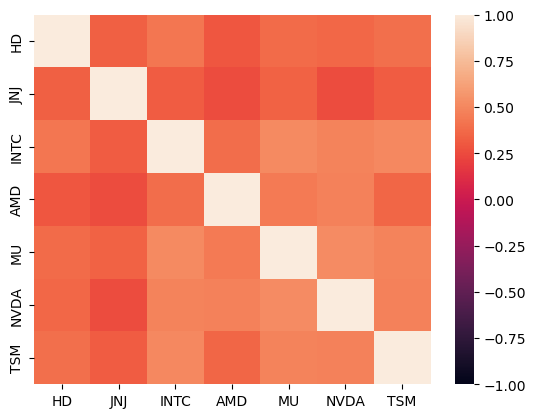

In [20]:
# Create a heatmap from the correlation values
sns.heatmap(correlation, vmin=-1, vmax=1)